In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import codecs
import os
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
from nltk.tokenize import word_tokenize

In [3]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [4]:
dataset_url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
df = pd.read_csv(dataset_url, sep='\t')
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df.tail()

,Type,Message
651,ham,Anything lor. Juz both of us lor.
652,ham,Get me out of this dump heap. My mom decided t...
653,ham,Ok lor... Sony ericsson salesman... I ask shuh...
654,ham,Ard 6 like dat lor.
655,ham,Why don't you wait 'til at least wednesday to ...


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
encoder.fit_transform(df['Type'])

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [11]:
df['Type'] = encoder.fit_transform(df['Type'])

In [12]:
df.head()

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check for duplicate values

In [13]:
df.duplicated().sum()

9

### Remove duplicates

In [14]:
df = df.drop_duplicates(keep = 'first')

In [15]:
df.duplicated().sum()

0

### Shape of df

In [16]:
df.shape

(647, 2)

### Exploratory data analysis

In [17]:
df['Type'].value_counts()

0    568
1     79
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x1e953b33880>,
 [Text(-1.0200577719727528, 0.4116820883132807, 'ham'),
  Text(1.0200577527005221, -0.411682136065631, 'spam')],
 [Text(-0.5563951483487741, 0.22455386635269856, '87.79'),
  Text(0.5563951378366484, -0.22455389239943505, '12.21')])

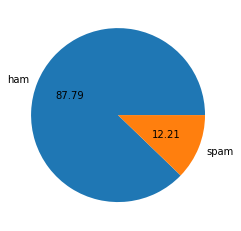

In [18]:
### Use piechart

import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# It gives the number of messages in length and gives in a new variables
df['Message'].apply(len)

0      111
1       29
2      155
3       49
4       61
      ... 
651     33
652     70
653     96
654     19
655     67
Name: Message, Length: 647, dtype: int64

In [21]:
# Here we are deriving the number of characters columns
df['num_characters'] = df['Message'].apply(len)

In [22]:
df.head()

,Type,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# next I will fetch the number of words
#the below code gives the break of each and every word 
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0      [Go, until, jurong, point, ,, crazy, .., Avail...
1               [Ok, lar, ..., Joking, wif, u, oni, ...]
2      [Free, entry, in, 2, a, wkly, comp, to, win, F...
3      [U, dun, say, so, early, hor, ..., U, c, alrea...
4      [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                             ...                        
651        [Anything, lor, ., Juz, both, of, us, lor, .]
652    [Get, me, out, of, this, dump, heap, ., My, mo...
653    [Ok, lor, ..., Sony, ericsson, salesman, ..., ...
654                          [Ard, 6, like, dat, lor, .]
655    [Why, do, n't, you, wait, 'til, at, least, wed...
Name: Message, Length: 647, dtype: object

In [24]:
#need to count the length of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
# now print the columns, we have two columns here
df.head()

,Type,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# Now check the number of senteces
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,Type,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,78.746522,18.344668,1.995363
std,55.964668,12.591961,1.414753
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,114.500000,26.000000,2.000000
max,588.000000,153.000000,16.000000


In [29]:
# ham
df[df['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,568.000000,568.000000,568.000000
mean,70.558099,17.012324,1.834507
std,53.515629,12.550773,1.332304
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,14.000000,1.000000
75%,92.000000,22.250000,2.000000
max,588.000000,153.000000,16.000000


In [30]:
#spam 
df[df['Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,79.000000,79.000000,79.000000
mean,137.620253,27.924051,3.151899
std,33.502508,7.889903,1.459615
min,33.000000,6.000000,1.000000
25%,135.000000,26.000000,2.000000
50%,152.000000,29.000000,3.000000
75%,157.500000,32.000000,4.000000
max,183.000000,46.000000,9.000000


In [31]:
import seaborn as sns

In [32]:
df[df['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,568.000000,568.000000,568.000000
mean,70.558099,17.012324,1.834507
std,53.515629,12.550773,1.332304
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,14.000000,1.000000
75%,92.000000,22.250000,2.000000
max,588.000000,153.000000,16.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

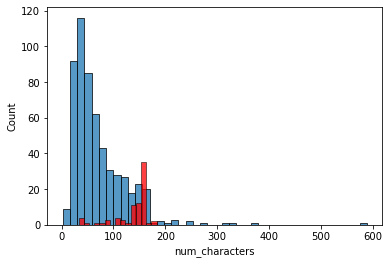

In [33]:
sns.histplot(df[df['Type'] == 0]['num_characters'])
sns.histplot(df[df['Type'] == 1]['num_characters'],color='red')

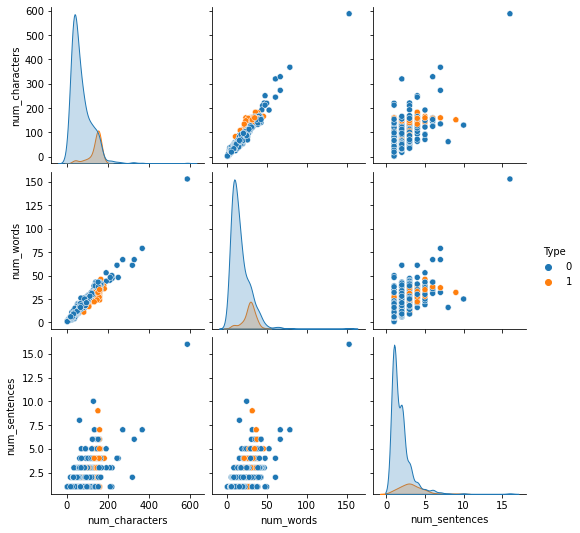

In [34]:
sns.pairplot(df,hue='Type')

<AxesSubplot:>

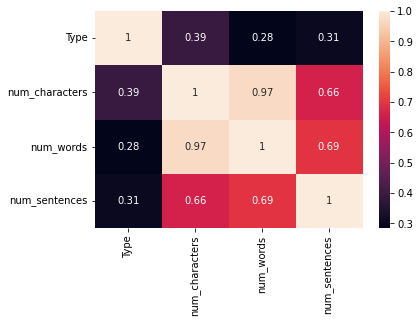

In [35]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing
#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation 
#### Stemming

In [36]:
# create a function which can handle all those preprocessing 
def transform_text(text):
    text = text.lower()
    return text

In [37]:
transform_text("Hi how RRR U")

'hi how rrr u'

In [38]:
## removing specialcharacters
## We are only keeping the characters which are either alpha numeric and alphabhetical
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []  
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
### Import the important libraries for the NLp
## root form of words 

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [43]:
transform_text('Hi I love machine learning?. How about you')

'hi love machin learn'

In [44]:
df['transform_message'] = df['Message'].apply(transform_text)

In [45]:
df.head(3)

,Type,Message,num_characters,num_words,num_sentences,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [46]:
df[df['Type'] == 1]['transform_message'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 '500 new mobil 2004 must go txt nokia 89545 collect today 2optout',
 'u meet ur dream partner soon ur career 2 flyng start 2 find free txt horo follow ur star sign horo ari',
 'text meet someon sexi today u find date even flirt join 4 10p repli name age eg sam 25 18 recd thirtyeight penc',
 'free rington wait collect simpli text password mix 85069 verifi get usher britney fml po box 5249 mk

In [47]:
spam_corpus = []
for msg in df[df['Type'] == 1]['transform_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

1203

In [49]:
!pip install Counter


In [50]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,46
1,free,27
2,mobil,20
3,text,17
4,u,16
5,2,14
6,txt,14
7,claim,12
8,4,12
9,prize,11


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


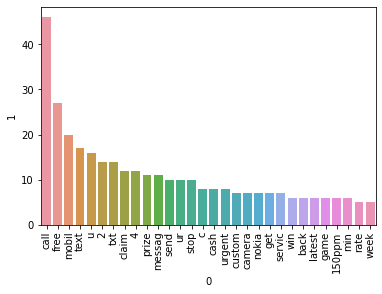

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building 

In [52]:
df.head(3)

,Type,Message,num_characters,num_words,num_sentences,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [54]:
X = cv.fit_transform(df['transform_message']).toarray()

In [55]:
X.shape

(647, 2032)

In [56]:
y = df['Type'].values

In [57]:
y

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [61]:
gnb = GaussianNB()

In [62]:
mnb = MultinomialNB()

In [63]:
bnb = BernoulliNB()

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8461538461538461
[[97 14]
 [ 6 13]]
0.48148148148148145


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb    
}

In [68]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [69]:
train_classifier(svc, X_train,y_train,X_test,y_test)


(0.9, 0.75)

In [70]:
train_classifier(xgb, X_train,y_train,X_test,y_test)

(0.9, 0.8)

In [71]:
train_classifier(knc, X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8538461538461538, 0.0)

In [72]:
train_classifier(gbdt, X_train,y_train,X_test,y_test)

(0.8769230769230769, 0.7142857142857143)

In [73]:
train_classifier(etc, X_train,y_train,X_test,y_test)

(0.9, 1.0)

In [74]:
train_classifier(abc, X_train,y_train,X_test,y_test)

(0.8692307692307693, 0.625)

In [75]:
train_classifier(rfc, X_train,y_train,X_test,y_test)

(0.9, 1.0)

### Model tunning

In [76]:
#Scaling the x features in the same scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(X)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
ll=LogisticRegression(solver='lbfgs')

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.30, random_state=62)

In [81]:
ll.fit(x_train, y_train)

LogisticRegression()

In [82]:
y_pred_scaled=ll.predict(x_test)

In [83]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0]


In [84]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, accuracy_score

In [85]:
confusion_matrix(y_test, y_pred_scaled)

array([[172,   0],
       [ 22,   1]], dtype=int64)

In [86]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       172
           1       1.00      0.04      0.08        23

    accuracy                           0.89       195
   macro avg       0.94      0.52      0.51       195
weighted avg       0.90      0.89      0.84       195



In [87]:
f1_score(y_test, y_pred_scaled)

0.08333333333333333

In [88]:
print(roc_curve(y_test, y_pred_scaled))

(array([0., 0., 1.]), array([0.        , 0.04347826, 1.        ]), array([2, 1, 0]))


In [89]:
roc_auc_score(y_test, y_pred_scaled)

0.5217391304347826

### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rr=RandomForestClassifier()

In [92]:
rr.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
y_pred_rr=rr.predict(x_test)

In [94]:
y_pred_rr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
confusion_matrix(y_test, y_pred_rr)

array([[172,   0],
       [ 20,   3]], dtype=int64)

In [96]:
accuracy_score(y_test, y_pred_rr)

0.8974358974358975

In [97]:
print(classification_report(y_test, y_pred_rr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       172
           1       1.00      0.13      0.23        23

    accuracy                           0.90       195
   macro avg       0.95      0.57      0.59       195
weighted avg       0.91      0.90      0.86       195



In [98]:
f1_score(y_test, y_pred_rr)

0.23076923076923078

In [99]:
roc_auc_score(y_test, y_pred_rr)

0.5652173913043478

### XGBoost Classifier

In [100]:
from xgboost import XGBClassifier

In [101]:
%%time
model =XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)


Wall time: 0 ns


In [102]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
y_pred_xgb=model.predict(x_test)

In [104]:
accuracy_score(y_test,y_pred_xgb)

0.8717948717948718

In [105]:
f1_score(y_test, y_pred_xgb)

0.5098039215686274

In [106]:
confusion_matrix(y_test, y_pred_xgb)

array([[157,  15],
       [ 10,  13]], dtype=int64)

In [107]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       172
           1       0.46      0.57      0.51        23

    accuracy                           0.87       195
   macro avg       0.70      0.74      0.72       195
weighted avg       0.88      0.87      0.88       195



In [108]:
accuracy = accuracy_score(y_test, y_pred_xgb)

In [109]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.18%


In [ ]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

clf =XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(x_train, y_train)

In [ ]:
y_pred_xgb_cv=grid.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_xgb_cv)

In [ ]:
confusion_matrix(y_test, y_pred_xgb_cv)

### Validation Test

In [ ]:
from sklearn.model_selection 